In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
## At first we initialize the dataset that we are going to work upon
dataset = fetch_california_housing()

In [5]:
## Then we segregate the data into the input data and the output target field data for a fruitful model building
X = dataset['data']
Y = dataset['target']
feature_names = dataset['feature_names']

In [ ]:
## Now we have to split the data into training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
weights = []
r2_score_list = []
mse_score = []
alpha_list = [0, 0.00002, 0.0004, 0.00067, 0.00078, 0.00085]

for lambda_1 in range(len(alpha_list)):
  ## Model Fit
  model = Lasso(alpha = lambda_1)
  model.fit(X_train, Y_train)

  ##Model Prediction
  Y_predicted = model.predict(X_test)

  ## r2_score_list storing for every iterative value of alpha
  r2_score_list.append(r2_score(Y_test, Y_predicted))
  mse_score.append(mean_squared_error(Y_test, Y_predicted))

  ## finding out the weights to the different input parameters and stuff for the input parameter dataset
  ## ## In some cases while using data-structures like a numpy array we have to use the method .to_list() method to convert them into python compatilble list
  weights.append(model.coef_.tolist())

<ipython-input-174-3ad6d9e7c5c2>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, Y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.781e+03, tolerance: 1.936e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(weights)
print(r2_score_list)

[[0.4458225653062099, 0.009681867985916508, -0.12209511171129221, 0.7785995569755857, -7.757404001716078e-07, -0.0033700266700968855, -0.4185367465006254, -0.43368797592440506], [0.14723953050809918, 0.005957193618396167, 0.0, -0.0, -5.599668678087636e-06, -0.0, -0.0, -0.0], [0.0, 0.0, 0.0, -0.0, -2.3145971556844425e-05, -0.0, -0.0, -0.0], [0.0, 0.0, 0.0, -0.0, -2.2376754691282704e-05, -0.0, -0.0, -0.0], [0.0, 0.0, 0.0, -0.0, -2.1607537825720982e-05, -0.0, -0.0, -0.0], [0.0, 0.0, 0.0, -0.0, -2.0838320960159264e-05, -0.0, -0.0, -0.0]]
[0.5957702326061662, 0.288000383674784, 0.0006351765209635651, 0.0006302155568405077, 0.0006241354101101937, 0.0006169360807727342]


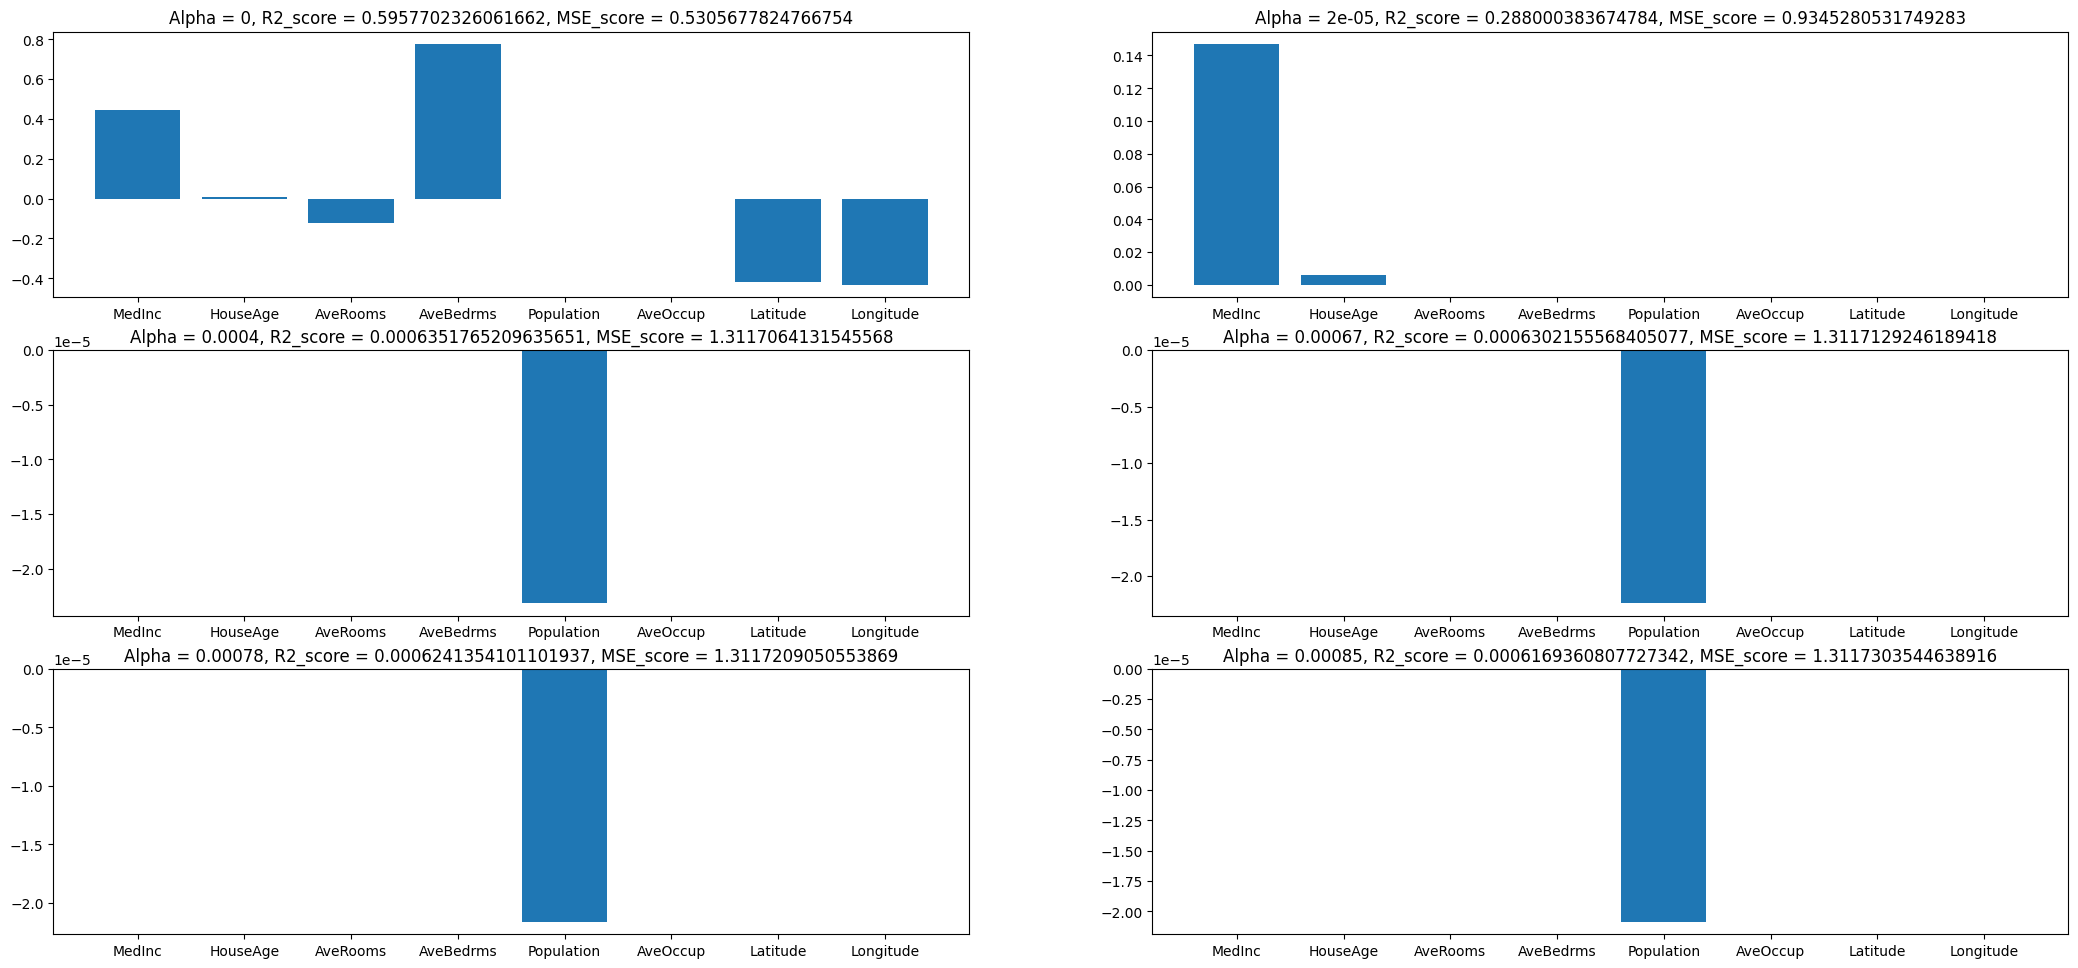

In [ ]:
# Visualizing Feature Selection

plt.figure(figsize=(26,20))

for i in range(len(alpha_list)):
  plt.subplot(5, 2, i+1)
  plt.bar(feature_names, weights[i])
  plt.title('Alpha = {}, R2_score = {}, MSE_score = {}'.format(alpha_list[i], r2_score_list[i], mse_score[i]))

plt.show()

In [6]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [7]:
# Create a SelectKBest object
selector = SelectKBest(mutual_info_regression, k=3)

# Fit and transform the data
x_new = selector.fit_transform(X, Y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names =[] #[feature_names[i] for i in selected_indices]
for i in selected_indices:
  selected_feature_names.append(feature_names[i])
print(selected_indices)
print(x_new.shape)
print("The top 3 selected Feature Names are:", selected_feature_names)

[0 6 7]
(20640, 3)
The top 3 selected Feature Names are: ['MedInc', 'Latitude', 'Longitude']


#1. As we can see that the dataset has hardly any scope for regularization but still it can be inferred that the 3 most important feature of the dataset are Median Income, House Age and Population.
# 2. So after taking away more than 3 input parameters the model accuracy starts to decrease drastically and pretty evidently.

**GETTING STARTED WITH RIDGE (L2) REGRESSION**

In [ ]:
dataset_1 = fetch_california_housing()

In [ ]:
X1 = dataset['data']
Y1 = dataset['target']
feature_names_1 = dataset['feature_names']

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

In [ ]:
weights_1 = []
r2 = []
mse_1 = []
alpha1_list = [0, 0.1, 0.15, 0.2, 0.3, 0.5, 1.6]

for lambda_2 in range(len(alpha1_list)):

  model_1 = Ridge(alpha = lambda_2)
  model_1.fit(X1_train, Y1_train)

  Y1_predicted = model.predict(X1_test)

  r2.append(r2_score(Y1_test, Y1_predicted))
  mse_1.append(mean_squared_error(Y1_test, Y1_predicted))

  weights_1.append(model_1.coef_.tolist())


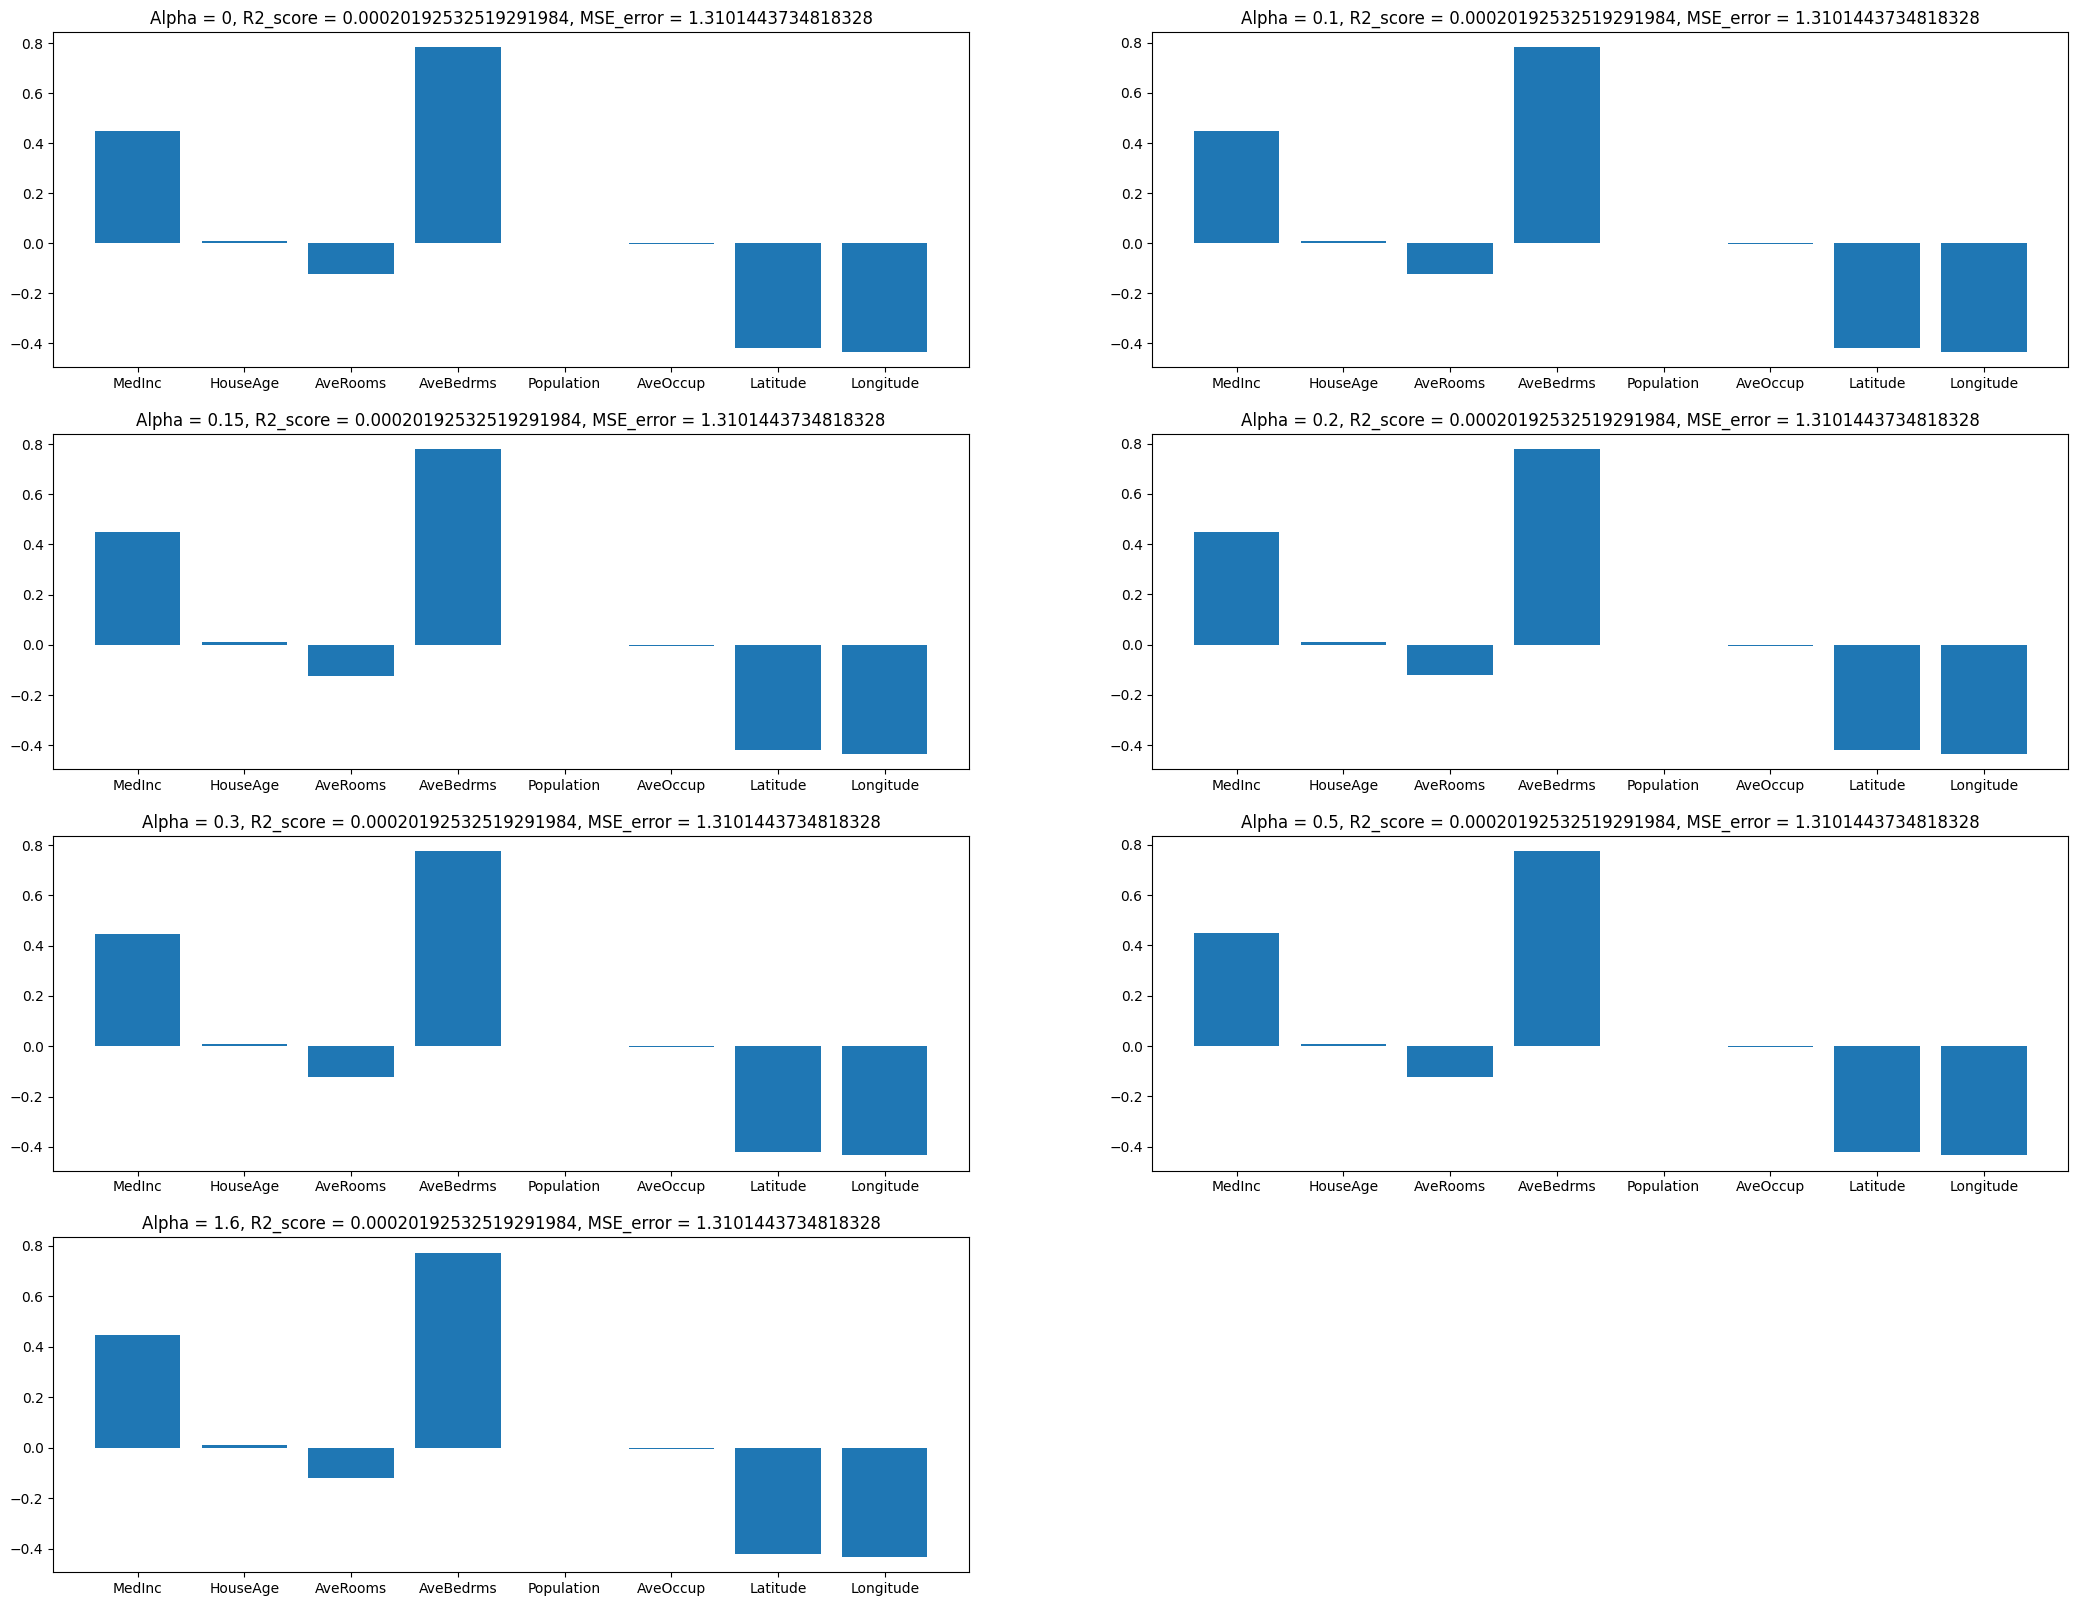

In [ ]:
# Visualizing Feature Selection

plt.figure(figsize=(26,20))

for i in range(len(alpha1_list)):
  plt.subplot(4, 2, i+1)
  plt.bar(feature_names_1, weights_1[i])
  plt.title('Alpha = {}, R2_score = {}, MSE_error = {}'.format(alpha1_list[i], r2[i], mse_1[i]))

plt.show()

# 3. HENCE AS WE CAN CLEARLY AND PRETTY EVIDENTLY SEE THAT THE FEATURE SELECTION DOESN'T TAKE PLACE FOR RIDGE REGRESSION EVEN FOR THE SAME VALUES OF ALPHA THAT DID PRETTY AGGRESSIVE FEATURE SELECTION IN CASE OF LASSO(L1) REGULARIZATION

### EXECUTING SVM REGRESSION

In [ ]:
dataset_2 = fetch_california_housing()

In [ ]:
X2 = dataset_2['data']
Y2 = dataset_2['target']

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 42)

In [ ]:
regr = SVR()

In [ ]:
regr.fit(X2_train, Y2_train)

SVR()

In [ ]:
Y2_train_outcome = regr.predict(X2_train)

In [ ]:
Y2_predicted = regr.predict(X2_test)

In [ ]:

print("The R2_score for the SVM regression model is: ", r2_score(Y2_test, Y2_predicted))
print("The mean squared error of the SVM regression model is: ", mean_squared_error(Y2_test, Y2_predicted))

The R2_score for the SVM regression model is:  -0.01648536010717372
The mean squared error of the SVM regression model is:  1.3320115421348744


# **The Inference that I could draw from this last SVM based regression is that the Regression model that we are currently utilizing to build our model is unable to caput**